# CAP 4630 HW 4

Daniel Silva

In [0]:
import keras
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.datasets import mnist

import matplotlib.pyplot as plt

#### General Concepts

**Artificial Intelligence**: At a high level, Artificial Intelligence involves the development of computer programs and systems able to perform tasks which normally require human intelligence and skills such as visual perception, speech recognition, decision-making, and language translation.

**Machine Learning**: This is a subclass of Artificial Intelligence, and can generally be described as a field of study which enables computers to learn without being explicitly programmed. This is acheived by machine learning algorithms built to learn and adjust their parameters in response to the data they encounter. 

There are three central paradigms in machine learning:

- Supervised Learning: Here, a model learns via a set of labeled inputs and attempts to estimate some value. An error would then be calculated between the predictions and ground truths, so the model can adjust itself accordingly.

- Unsupervised Learning: Now, training is centered around an unlabeled dataset. The model now learns by finding meaningful patterns between the dataset.

- Reinforcement Learning: This class of machine learning frames the problem as an agent within an environment. These agents are able to learn from experience by maximizes


A few supervised learning algorithms include:

- Linear and logistic Regression
- k-Nearest Neighbor (kNN)
- Support Vector Machines
- Decision Trees and Random Forests

**Deep Learning**: Deep learning is a subclass within machine learning which leverages deep neural networks to extract high dimensional features and information from complex data. These nueral networks are trained using the backprogration algorithm. A number of nueral network architectures are listed below. These can all be customized or combined to solve different problems.

- Artificial Neural Networks (ANN): These can be used flexibility, although a common application is to tabular data 
- Convolutional Neural Network (CNN): CNNs excel in finding features and patterns in unstructed data such as image or voice recordings. Possible applications include image classification, object detection, scene degmentation, robotic perception and many more.
- Recurrent Neural Networks (RNNs): RNNs are suited for problems which have a temporal aspect. This is attributed to their ability to store information sequecntially. A powerful and widely applied extension of this is known as an LSTM, standing for long short term memory.

#### Building a Model

Neural Networks are composed of linear layers followed by nonlinearities, or activation functions. In a convolutional neural network, the overall architecture can include the following layers:

- Convolutional Layer: Here, a filter is slid across an inputted image , performing a computation known as a convolution. This allows the algorithm to extract what are known as features from an image. These features would then be passed through a non-linearity, and then to a following conv layer. This process allows the model to extract increasingly complex features from an image, which will be used later for classification.
- Non-linearities: Possible non linearities include ReLU, TanH, Leaky ReLU and more. Softmax or sigmoid will be used in the final output layer.
- Output layer: Once features have been extracted, they will be sent to this output layer. 3d features would be flattened and sent through at least one fully connected layer. To generate the final prediction array, these activations will be sent through a final non-linearity to create the confidence predictions. Softmax allows for a single class of prediction while sigmoid allows for multi-class classification
- Additional layers include batch normalization and dropout used to reduce overfitting, which we'll discuss more later.


Building a model in keras can be done like so:


In [31]:
# set up the layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

#### Compiling a Model

Before training a model, we need to compile the model. This mainly involves selecting hyperparameters, a loss function, optimizer, and accuracy metrics.

-  Loss function: The loss function allows the model to estimate its performance against the training labels. The results of the loss function will directly impact how the weights are updated. Typically, the gradients of the loss function are calculated and the weights are adjusted in the direction of the negative gradient. This process is known as backprogation. 
-  Optimizer: The optimizer is used to update the weights in the network based of the gradients in the loss function. The most common of these include Gradient Descent, Stochastic Gradient Descent, Adam, and RMSprop. The underlying function behind all optimizers, however, is gradent descent
-  Learning rate: When updating weights, the learning rate decides how much the update the weights after each batch or epoch. A low learning rate will make the model converge to a minimum in the loss function must slower, however, too high a learning rate may cause the model to never converge.
-  Epochs: The number of epochs represents how many times to go through the training set.

Compiling a model in keras can be done like so:

In [0]:
# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#### Training a Model

Once having compiled the model, we can train it. The general training process involves looping through a set of inputs, sending them through the model, and predicting their outputs. We can then calculate the a loss between our predictions and the ground truth values, and finally update the weights accordingly. This process continues until a certain accuracy is reached or we've loop through the inputs a given number of times.

When training, we'll usually use a training set, which predicts on and learns from, a validation set, which is used for testing during training, and finally, a true testing hold-out set to be used for validation and inference post-training. If the dataset is too similar, too difficult, too small, or hyperparameters are not set correctly, one of two worst case scenarios may occurr
-  Overfitting: when a data set is is trained really well but poor results in general cases and other data. On a graph overfitting would be if a line of best fit was trying to get every possible point. 
- Underfitting: On the otherhand, underfitting is when the performance is poor on a training data and poor as well on the general data case. The graph for underfitting looks like it doesn't follow the data set.

Training a model can be done like so in keras. We'll load in the MNIST dataset and train this model to classify digits from MNIST.

In [34]:
(train_images_original, train_labels), (test_images_original, test_labels) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1496 - acc: 0.9541 - val_loss: 0.0423 - val_acc: 0.9867
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0478 - acc: 0.9854 - val_loss: 0.0445 - val_acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 60s 996us/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0260 - val_acc: 0.9911
Epoch 4/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0265 - acc: 0.9918 - val_loss: 0.0256 - val_acc: 0.9921
Epoch 5/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0367 - val_acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0183 - acc: 0.9944 - val_loss: 0.0263 - val_acc: 0.9915
Epoch 7/10
60000/60000 [======

Then, we can display the training loss and accuracy per epoch.

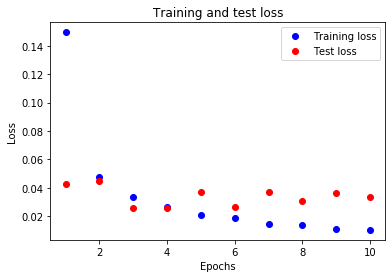

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

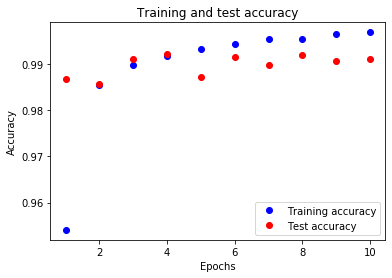

In [39]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Finetuning a Pretrained Model

Rather than training a model from scratch, we can utilize a pretrained model. This works well when the training set you are working with is quite small. These pretrained models have been trained on massive datasets, ImageNet being the most common, for multiple days with powerful GPUs. The idea is to leverage what this pretrained model learned from a dataset such as ImageNet, on a more specific problem or dataset. Often times this works just fine, however, in order to truly customize and fit this new to a custom dataset, we'd need to fine tune it. 

It should be noted that many of these models come with their layers 'frozen'. In other words, weights in these models will remain static during training, unless told otherwise. In order to finetune these layers for to a custom dataset, we'll unfreeze some of the layers. It is also important to understand that in a CNN, the later layers will be more learning the more complex features, while earlier layers learn to extract simple shapes, lines and gradients. Hence, it is often good practice to teach this pretrained model to extract high-level features specific to this new data. This would be acheived by unfreezing and training some of the later layers, while leaving the earlier layers untouched.

Loading a pretrained VGG model and unfreezing the last 5 layers in it for training can be done like so:

In [0]:
# Arbitrary image size
image_size = 224

# Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the layers except the last 5 layers
for layer in vgg_conv.layers[:-5]:
    layer.trainable = False

# Create the vgg model
model = models.Sequential()
model.add(vgg_conv)
 
# Add fully connected layers and output layer
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
 
model.summary()

58892288/58889256 [==============================] - 2s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 3075      
Total params: 40,408,899
Trainable params: 32,773,635
Non-trainab